In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [2]:
bj = pd.read_csv('../data/blkjckhands.csv')
bj.head(18)

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
5,5,Player6,6,1,8,10,0,25,10,8,...,0,0,18,nowin,Loss,Bust,PlBust,0,10,7
6,0,Player1,10,4,0,0,0,14,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,14
7,1,Player2,3,10,0,0,0,13,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,13
8,2,Player3,10,2,0,0,0,12,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,12
9,3,Player4,9,6,0,0,0,15,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,15


In [25]:
bj.shape

(900000, 21)

In [26]:
bj.dtypes

Unnamed: 0      int64
PlayerNo       object
card1           int64
card2           int64
card3           int64
card4           int64
card5           int64
sumofcards      int64
dealcard1       int64
dealcard2       int64
dealcard3       int64
dealcard4       int64
dealcard5       int64
sumofdeal       int64
blkjck         object
winloss        object
plybustbeat    object
dlbustbeat     object
plwinamt        int64
dlwinamt        int64
ply2cardsum     int64
dtype: object

In [13]:
bj[bj['blkjck']=='Win']['blkjck'].count()

43061

In [16]:
bj[(bj['blkjck']=='Win') & (bj['sumofdeal']!=21)]['blkjck'].count()

37985

In [24]:
bj[(bj['blkjck']=='Win') & (bj['sumofdeal']!=21)].groupby('PlayerNo').count()

,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
PlayerNo,,,,,,,,,,,,,,,,,,,,
Player1,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303
Player2,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386
Player3,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308
Player4,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340
Player5,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319
Player6,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329


In [50]:
bj[(bj['blkjck']=='Win') & (bj['sumofdeal']!=21)].groupby('card1').count()

,Unnamed: 0,PlayerNo,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
card1,,,,,,,,,,,,,,,,,,,,
10,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069
11,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916


In [20]:
bj[(bj['blkjck']=='nowin')].groupby('card1').count()

,Unnamed: 0,PlayerNo,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
card1,,,,,,,,,,,,,,,,,,,,
1,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046
2,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611
3,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309
4,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112
5,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543
6,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236
7,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003
8,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864
9,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022


In [32]:
what_players_are_win_most = bj[bj['winloss']=='Win'].groupby('PlayerNo').count()['Unnamed: 0'].to_frame().reset_index()

In [37]:
what_players_are_win_most

,PlayerNo,Unnamed: 0
0,Player1,64396
1,Player2,64340
2,Player3,64305
3,Player4,64421
4,Player5,64106
5,Player6,64378


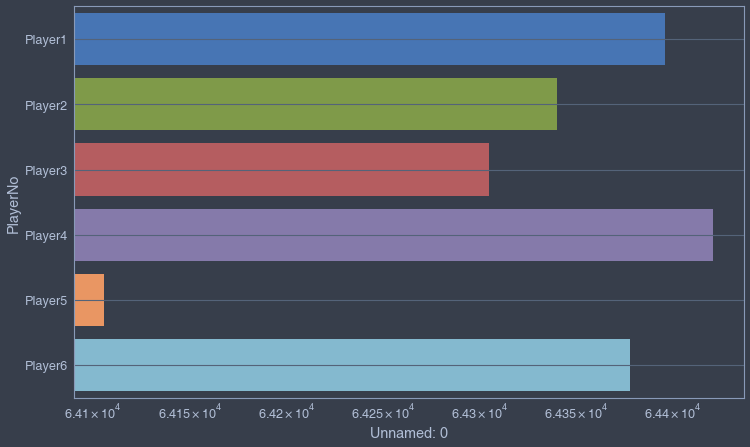

In [59]:
ax = sns.barplot(data=what_players_are_win_most, x='Unnamed: 0', y='PlayerNo')
ax.set_xscale('log')
ax.grid()

In [19]:
bj.groupby('card1').count()

,Unnamed: 0,PlayerNo,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
card1,,,,,,,,,,,,,,,,,,,,
1,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046
2,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611
3,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309
4,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112
5,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543
6,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236
7,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003
8,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864
9,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022


In [36]:
_1st_game = bj.iloc[:6][['card1', 'card2', 'card3', 'card4', 'card5']]
_1st_game

,card1,card2,card3,card4,card5
0,7,10,0,0,0
1,10,9,0,0,0
2,9,8,0,0,0
3,2,10,0,5,0
4,10,2,0,5,0
5,6,1,8,10,0


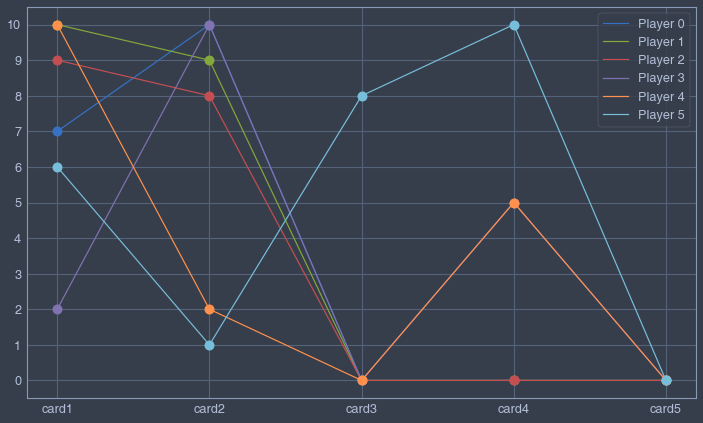

In [93]:
fig, ax = plt.subplots()

for i in range(_1st_game.shape[0]):
    ax.plot(_1st_game.iloc[i], label=f'Player {i}')
    for j in range(_1st_game.iloc[i].shape[0]):
        ax.plot(j, _1st_game.iloc[i][j], 'o', markersize=10, c=ax.get_lines()[-1].get_color())

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.yaxis.set_ticks(np.arange(0, 11));

In [22]:
sum_of_cards_that_win = bj[bj['winloss']=='Win'].groupby('sumofcards').count().reset_index()
sum_of_dealer_cards_that_win = bj[bj['dlbustbeat']=='Dlwin'].groupby('sumofdeal').count().reset_index()

<AxesSubplot:title={'center':'The Sum of Cards that Dealer had when Winning'}, xlabel='sumofdeal', ylabel='Unnamed: 0'>

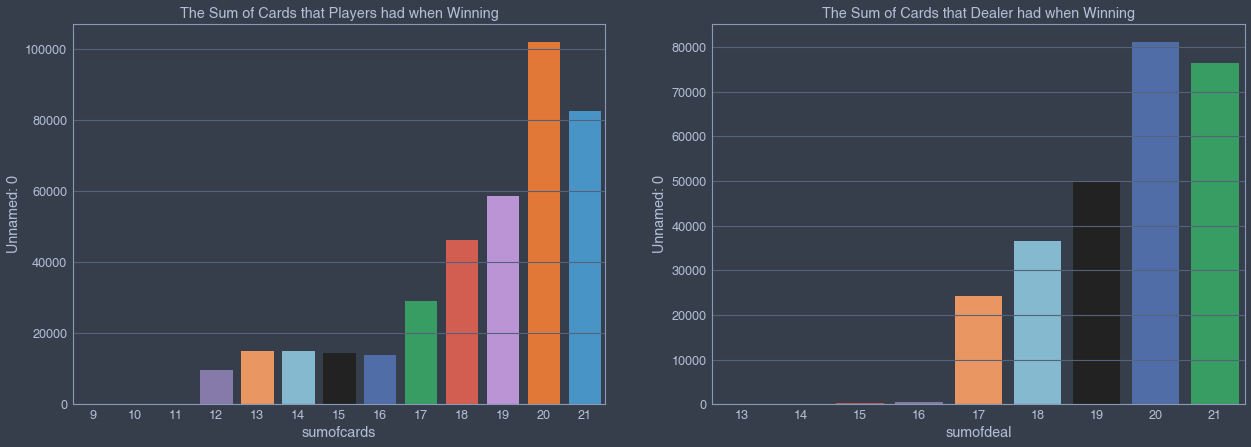

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax[0].set_title('The Sum of Cards that Players had when Winning')
ax[1].set_title('The Sum of Cards that Dealer had when Winning')

sns.barplot(data=sum_of_cards_that_win, x='sumofcards', y='Unnamed: 0', ax=ax[0])
sns.barplot(data=sum_of_dealer_cards_that_win, x='sumofdeal', y='Unnamed: 0', ax=ax[1])

In [48]:
bj[(bj['winloss']=='Win') & (bj['sumofcards']==9)]

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
18062,2,Player3,2,3,2,1,1,9,3,9,...,10,0,25,nowin,Win,DlBust,Bust,20,0,5
435910,4,Player5,2,2,2,2,1,9,8,7,...,0,0,25,nowin,Win,DlBust,Bust,20,0,4
828196,4,Player5,2,2,2,1,2,9,3,10,...,0,0,23,nowin,Win,DlBust,Bust,20,0,4
840883,1,Player2,2,2,2,2,1,9,11,2,...,1,7,23,nowin,Win,DlBust,Bust,20,0,4
